In [16]:
import pandas
import numpy
import seaborn
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import *

In [17]:
file_path = "..//6 - Dataset//1075.pkl"

In [18]:
with open(file_path,"rb") as f:
    table = pandas.read_pickle(f)

In [19]:
table

,id,score,added_files,LdrUnloadDll,NtReadFile,CreateActCtxW,NtOpenKey,SetFilePointer,SetUnhandledExceptionFilter,SetErrorMode,...,19cd4deb02d2b5,20d46f118a5e92,26df34c6b83ece,34c40c3f22b377,046a416f4a41da,44f0c8fe6fd1c0,54f07b825fd662,74ce1be7fe3286,67a1130899695f,64f3d2db7a782f
0,1000,6.2,0,1.0,2.0,8.0,1.0,1.0,2.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1001,15.2,4168,48.0,3968.0,2.0,44.0,NaN,NaN,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1002,11.0,1,14.0,245.0,14.0,53.0,1.0,5.0,258.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1003,15.4,4127,26.0,3934.0,2.0,31.0,NaN,2.0,26.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1004,6.2,0,1.0,2.0,8.0,1.0,1.0,2.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1071,993,16.0,4069,28.0,7665.0,6.0,87.0,NaN,3.0,256.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1072,994,6.2,0,1.0,2.0,8.0,1.0,1.0,2.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1073,995,4.8,0,3.0,2.0,8.0,2.0,1.0,2.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1074,996,9.8,1,14.0,245.0,14.0,44.0,1.0,5.0,258.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
"id" in table.columns, "score" in table.columns

(True, True)

In [21]:
sorted(table["id"])

[192,
 193,
 194,
 195,
 196,
 197,
 198,
 199,
 200,
 201,
 202,
 203,
 204,
 205,
 206,
 207,
 208,
 209,
 210,
 211,
 212,
 213,
 214,
 215,
 216,
 217,
 218,
 219,
 220,
 221,
 222,
 223,
 224,
 225,
 226,
 227,
 228,
 229,
 230,
 231,
 232,
 233,
 234,
 235,
 236,
 237,
 238,
 239,
 240,
 241,
 242,
 243,
 244,
 245,
 246,
 247,
 248,
 249,
 250,
 251,
 252,
 253,
 254,
 255,
 256,
 257,
 258,
 259,
 260,
 261,
 262,
 263,
 264,
 265,
 266,
 267,
 268,
 269,
 270,
 271,
 272,
 273,
 274,
 275,
 276,
 277,
 278,
 279,
 280,
 281,
 282,
 283,
 284,
 285,
 286,
 287,
 288,
 289,
 290,
 291,
 292,
 293,
 294,
 295,
 296,
 297,
 298,
 299,
 300,
 301,
 302,
 303,
 304,
 305,
 306,
 307,
 308,
 309,
 310,
 311,
 312,
 313,
 314,
 315,
 316,
 317,
 318,
 319,
 320,
 321,
 322,
 323,
 324,
 325,
 326,
 327,
 328,
 329,
 330,
 331,
 332,
 333,
 334,
 335,
 336,
 337,
 338,
 339,
 340,
 341,
 342,
 343,
 344,
 345,
 346,
 347,
 348,
 349,
 350,
 351,
 352,
 353,
 354,
 355,
 403,
 404,
 405

In [22]:
colunas = []
for col in table.columns:
    colunas.append(col)
print(sorted(colunas))

['', '00260c390ffab5', '00e815ade8f3ad', '04419b76566142', '046a416f4a41da', '04f710f755af9a', '0832b9544b38ae', '0aa8099c5a6506', '0d0ed90929351c', '0dcbc979c995ee', '14cb0affce00f0', '14d09a259f7256', '17b2425219679a', '19cd4deb02d2b5', '20d46f118a5e92', '20f74016f44481', '26df34c6b83ece', '277bbabf2bcffc', '2b8fe787f921aa', '2cf51d2d9edcfc', '2d4b2b807ace9d', '2d73ce9f8e11bb', '307a8158e69868', '30980f00bc1bcb', '320850e1cd91c5', '3338eb73de83e9', '34c40c3f22b377', '38d20104c7a295', '3b0cf9bc480a7f', '3ba4483c761a05', '3bbbc68fe566ca', '3e8efba2ef67cc', '3ea8f71bfb79e6', '3ec98567ef4b4e', '40c436f4ac5193', '44f0c8fe6fd1c0', '4672f4ade47a47', '4a5ac3c6f8383c', '4b753dc49f7e45', '4bb152c96ba9e2', '4be415c196067f', '4d3fb0e2d5ba3f', '4e1317c219c4bf', '4e5c233cf1270e', '4edbf2358a9820', '4f6ce92fccafa6', '5072678821b490', '51634f69ba2c47', '51923ec7455554', '5219bdf17e6cf7', '54f07b825fd662', '5a67b802ccb3ff', '5ace33358a8b11', '5b1f242aee0eab', '5fa14751ef7fa7', '645f2904cde1bd', '64f3

In [23]:
for column in table.columns:
    table[column].fillna(0, inplace =True)

In [25]:
table

,id,score,added_files,LdrUnloadDll,NtReadFile,CreateActCtxW,NtOpenKey,SetFilePointer,SetUnhandledExceptionFilter,SetErrorMode,...,19cd4deb02d2b5,20d46f118a5e92,26df34c6b83ece,34c40c3f22b377,046a416f4a41da,44f0c8fe6fd1c0,54f07b825fd662,74ce1be7fe3286,67a1130899695f,64f3d2db7a782f
0,1000,6.2,0,1.0,2.0,8.0,1.0,1.0,2.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1001,15.2,4168,48.0,3968.0,2.0,44.0,0.0,0.0,17.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1002,11.0,1,14.0,245.0,14.0,53.0,1.0,5.0,258.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1003,15.4,4127,26.0,3934.0,2.0,31.0,0.0,2.0,26.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1004,6.2,0,1.0,2.0,8.0,1.0,1.0,2.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1071,993,16.0,4069,28.0,7665.0,6.0,87.0,0.0,3.0,256.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1072,994,6.2,0,1.0,2.0,8.0,1.0,1.0,2.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1073,995,4.8,0,3.0,2.0,8.0,2.0,1.0,2.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1074,996,9.8,1,14.0,245.0,14.0,44.0,1.0,5.0,258.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
for col in table.columns:
    print (col + " => " + str(table[col].sum()))

# as colunas com hexa aleatrório provavelmente vão ser descartadas
# as colunas com os arquivos de extensão sys e dll provavelmente vão ser descartadas
# as colunas do pribvilégio provavelmente serão descartadas



id => 862302
score => 10926.8
added_files => 2002594
LdrUnloadDll => 135279.0
NtReadFile => 15076907.0
CreateActCtxW => 5245.0
NtOpenKey => 187331.0
SetFilePointer => 129383.0
SetUnhandledExceptionFilter => 6914.0
SetErrorMode => 87757.0
NtCreateFile => 4653509.0
NtClose => 25642467.0
GetSystemTimeAsFileTime => 492824.0
LdrLoadDll => 444110.0
NtTerminateProcess => 13638.0
GetFileAttributesW => 800263.0
CreateProcessInternalW => 257114.0
NtQueryValueKey => 1307452.0
CreateToolhelp32Snapshot => 3182.0
GetNativeSystemInfo => 28601.0
RegCloseKey => 404541.0
GetSystemInfo => 235154.0
RegQueryValueExA => 25763.0
NtOpenProcess => 190659.0
NtFreeVirtualMemory => 1559623.0
Process32NextW => 121659.0
RegOpenKeyExW => 468897.0
NtDelayExecution => 2179535.0
NtAllocateVirtualMemory => 2168906.0
RegOpenKeyExA => 25492.0
LdrGetDllHandle => 535569.0
Process32FirstW => 3082.0
CreateThread => 1391854.0
GetSystemDirectoryW => 11927.0
timeGetTime => 1362099.0
LoadStringW => 5064554.0
NtCreateMutant => 166

In [174]:
family = []

for i in range(len(table)):
    if 191<table["id"][i]<207:
        family.append("clop")
    elif(206<table["id"][i]<311):
        family.append("conti")
    elif(310<table["id"][i]<356):
        family.append("egregor")
    elif(401<table["id"][i]<452):
        family.append("lockbit")
    elif(451<table["id"][i]<469):
        family.append("mountlocker")
    elif(479<table["id"][i]<557):
        family.append("netwalker")
    elif(611<table["id"][i]<712): # acrescentar aqui as últimas amostras analisadas
        family.append("revil")
    elif(558<table["id"][i]<612):
        family.append("ryuk")
    elif(711<table["id"][i]<738):
        family.append("goodware")
    else:
        family.append("unknown")

In [210]:
family = []

for i in range(len(table)):
    if 191<table["id"][i]<207:
        family.append("malware")
    elif(206<table["id"][i]<311):
        family.append("malware")
    elif(310<table["id"][i]<356):
        family.append("malware")
    elif(401<table["id"][i]<452):
        family.append("malware")
    elif(451<table["id"][i]<469):
        family.append("malware")
    elif(479<table["id"][i]<557):
        family.append("malware")
    elif(611<table["id"][i]<712):
        family.append("malware")
    elif(558<table["id"][i]<612):
        family.append("malware")
    elif(711<table["id"][i]<738):
        family.append("goodware")
    else:
        family.append("unknown")

In [211]:
family

['unknown',
 'malware',
 'malware',
 'malware',
 'malware',
 'malware',
 'unknown',
 'malware',
 'malware',
 'malware',
 'malware',
 'malware',
 'malware',
 'unknown',
 'malware',
 'malware',
 'malware',
 'malware',
 'unknown',
 'malware',
 'malware',
 'malware',
 'malware',
 'malware',
 'malware',
 'malware',
 'malware',
 'malware',
 'malware',
 'malware',
 'malware',
 'unknown',
 'unknown',
 'malware',
 'malware',
 'malware',
 'malware',
 'malware',
 'malware',
 'malware',
 'malware',
 'malware',
 'malware',
 'malware',
 'malware',
 'malware',
 'malware',
 'malware',
 'malware',
 'malware',
 'malware',
 'unknown',
 'malware',
 'malware',
 'malware',
 'malware',
 'malware',
 'malware',
 'malware',
 'goodware',
 'malware',
 'malware',
 'unknown',
 'malware',
 'malware',
 'malware',
 'malware',
 'goodware',
 'malware',
 'malware',
 'malware',
 'malware',
 'malware',
 'goodware',
 'unknown',
 'malware',
 'malware',
 'malware',
 'malware',
 'malware',
 'malware',
 'malware',
 'malware',
 

In [254]:
family.count("goodware")

16

In [212]:
table = table.copy()

In [213]:
table['family'] = family

In [214]:
print(table.columns)

Index(['', 'NtDuplicateObject', 'CoUninitialize', 'NtQueryKey', 'LdrUnloadDll',
       'LookupPrivilegeValueW', 'NtClose', 'NtAllocateVirtualMemory',
       'LdrGetDllHandle', 'CoCreateInstance',
       ...
       'RegEnumValueA', 'InternetCrackUrlA', 'HttpSendRequestA',
       'InternetSetStatusCallback', 'InternetGetConnectedState',
       'ObtainUserAgentString', 'InternetConnectA', 'CryptProtectData',
       'InternetOpenUrlW', 'family'],
      dtype='object', length=261)


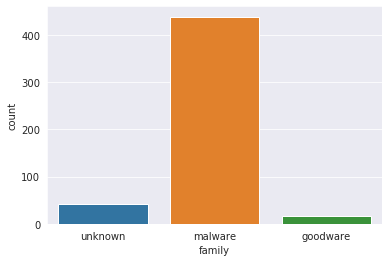

In [215]:
seaborn.countplot(x = table["family"])

In [216]:
# Preenche tudo que for NaN por zero (API chamada zero vezes)
for column in table.columns:
    table[column].fillna(0, inplace =True)

In [217]:
table

,,NtDuplicateObject,CoUninitialize,NtQueryKey,LdrUnloadDll,LookupPrivilegeValueW,NtClose,NtAllocateVirtualMemory,LdrGetDllHandle,CoCreateInstance,...,RegEnumValueA,InternetCrackUrlA,HttpSendRequestA,InternetSetStatusCallback,InternetGetConnectedState,ObtainUserAgentString,InternetConnectA,CryptProtectData,InternetOpenUrlW,family
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,unknown
1,0.0,1766.0,5.0,16.0,8.0,5.0,22672.0,11924.0,10.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,malware
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,malware
3,0.0,18.0,240.0,1027.0,45.0,1.0,18450.0,9116.0,211.0,52.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,malware
4,0.0,0.0,0.0,0.0,1.0,0.0,16.0,0.0,17.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,malware
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,0.0,0.0,0.0,0.0,1.0,0.0,12.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,malware
492,0.0,23.0,15.0,845.0,40.0,0.0,24775.0,894.0,490.0,14.0,...,42.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0,goodware
493,0.0,23.0,1.0,123.0,17.0,0.0,505.0,273.0,187.0,23.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,malware
494,0.0,0.0,0.0,0.0,3.0,0.0,35.0,13.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,malware


In [218]:
table.drop(columns=['id', 'score'], inplace=True)

In [219]:
"id" in table.columns, "score" in table.columns

(False, False)

In [185]:
#remover os unknown
index_names = table[ table['family'] == "goodware" ].index
table.drop(index_names, inplace = True)

In [220]:
#remover os unknown
index_names = table[ table['family'] == "unknown" ].index
table.drop(index_names, inplace = True)

In [221]:
table["family"]

1       malware
2       malware
3       malware
4       malware
5       malware
         ...   
491     malware
492    goodware
493     malware
494     malware
495     malware
Name: family, Length: 455, dtype: object

In [222]:
table.shape

(455, 259)

In [223]:
previsores_table = table.iloc[:, 0:258].values

In [224]:
previsores_table

array([[0.000e+00, 1.766e+03, 5.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [0.000e+00, 1.800e+01, 2.400e+02, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [0.000e+00, 2.300e+01, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00]])

In [225]:
classe_table = table.iloc[:,258].values

In [226]:
classe_table

array(['malware', 'malware', 'malware', 'malware', 'malware', 'malware',
       'malware', 'malware', 'malware', 'malware', 'malware', 'malware',
       'malware', 'malware', 'malware', 'malware', 'malware', 'malware',
       'malware', 'malware', 'malware', 'malware', 'malware', 'malware',
       'malware', 'malware', 'malware', 'malware', 'malware', 'malware',
       'malware', 'malware', 'malware', 'malware', 'malware', 'malware',
       'malware', 'malware', 'malware', 'malware', 'malware', 'malware',
       'malware', 'malware', 'malware', 'malware', 'malware', 'malware',
       'malware', 'malware', 'malware', 'malware', 'goodware', 'malware',
       'malware', 'malware', 'malware', 'malware', 'malware', 'goodware',
       'malware', 'malware', 'malware', 'malware', 'malware', 'goodware',
       'malware', 'malware', 'malware', 'malware', 'malware', 'malware',
       'malware', 'malware', 'malware', 'malware', 'malware', 'malware',
       'malware', 'malware', 'malware', 'malware

In [227]:
previsores_table_treinamento, previsores_table_teste, classe_table_treinamento, classe_table_teste = train_test_split(previsores_table, classe_table, test_size=0.33, random_state=0)

In [228]:
previsores_table_treinamento.shape

(304, 258)

In [229]:
svm_table = SVC(kernel= 'linear', random_state=1, C=3.0)
svm_table.fit(previsores_table_treinamento, classe_table_treinamento)

SVC(C=3.0, kernel='linear', random_state=1)

In [230]:
previsores = svm_table.predict(previsores_table_teste)
previsores

array(['goodware', 'malware', 'malware', 'malware', 'malware', 'malware',
       'malware', 'malware', 'malware', 'malware', 'malware', 'malware',
       'goodware', 'malware', 'malware', 'malware', 'malware', 'malware',
       'goodware', 'malware', 'malware', 'malware', 'malware', 'malware',
       'malware', 'malware', 'malware', 'malware', 'malware', 'malware',
       'malware', 'malware', 'malware', 'malware', 'malware', 'malware',
       'malware', 'malware', 'malware', 'malware', 'malware', 'malware',
       'malware', 'malware', 'malware', 'malware', 'malware', 'malware',
       'malware', 'malware', 'malware', 'malware', 'malware', 'malware',
       'malware', 'malware', 'malware', 'malware', 'malware', 'malware',
       'malware', 'malware', 'malware', 'malware', 'malware', 'malware',
       'malware', 'malware', 'malware', 'malware', 'malware', 'goodware',
       'malware', 'malware', 'malware', 'malware', 'malware', 'malware',
       'malware', 'goodware', 'malware', 'malwa

In [231]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(classe_table_teste, previsores)

0.9337748344370861

In [232]:
print(classification_report(classe_table_teste, previsores,zero_division=0))

              precision    recall  f1-score   support

    goodware       0.42      0.62      0.50         8
     malware       0.98      0.95      0.96       143

    accuracy                           0.93       151
   macro avg       0.70      0.79      0.73       151
weighted avg       0.95      0.93      0.94       151



In [233]:
rede_neural_table = MLPClassifier(verbose=True, max_iter=10000, tol=0.000001, solver='adam', activation='logistic', hidden_layer_sizes=(103,103))
rede_neural_table.fit(previsores_table_treinamento, classe_table_treinamento)

Iteration 1, loss = 0.74125778
Iteration 2, loss = 0.58963324
Iteration 3, loss = 0.46810691
Iteration 4, loss = 0.37179076
Iteration 5, loss = 0.29936044
Iteration 6, loss = 0.24389961
Iteration 7, loss = 0.20415936
Iteration 8, loss = 0.17713372
Iteration 9, loss = 0.15905966
Iteration 10, loss = 0.14687794
Iteration 11, loss = 0.13911970
Iteration 12, loss = 0.13286232
Iteration 13, loss = 0.12791572
Iteration 14, loss = 0.12558459
Iteration 15, loss = 0.12321543
Iteration 16, loss = 0.12268989
Iteration 17, loss = 0.12146974
Iteration 18, loss = 0.12075802
Iteration 19, loss = 0.12061536
Iteration 20, loss = 0.12024700
Iteration 21, loss = 0.12011449
Iteration 22, loss = 0.11973295
Iteration 23, loss = 0.11915754
Iteration 24, loss = 0.11914767
Iteration 25, loss = 0.11918751
Iteration 26, loss = 0.11898322
Iteration 27, loss = 0.11883832
Iteration 28, loss = 0.11864274
Iteration 29, loss = 0.11847344
Iteration 30, loss = 0.11825876
Iteration 31, loss = 0.11810913
Iteration 32, los

MLPClassifier(activation='logistic', hidden_layer_sizes=(103, 103),
              max_iter=10000, tol=1e-06, verbose=True)

In [234]:
prev = rede_neural_table.predict(previsores_table_teste)
prev

array(['malware', 'malware', 'malware', 'malware', 'malware', 'malware',
       'malware', 'malware', 'malware', 'malware', 'malware', 'malware',
       'malware', 'malware', 'malware', 'malware', 'malware', 'malware',
       'malware', 'malware', 'malware', 'malware', 'malware', 'malware',
       'malware', 'malware', 'malware', 'malware', 'malware', 'malware',
       'malware', 'malware', 'malware', 'malware', 'malware', 'malware',
       'malware', 'malware', 'malware', 'malware', 'malware', 'malware',
       'malware', 'malware', 'malware', 'malware', 'malware', 'malware',
       'malware', 'malware', 'malware', 'malware', 'malware', 'malware',
       'malware', 'malware', 'malware', 'malware', 'malware', 'malware',
       'malware', 'malware', 'malware', 'malware', 'malware', 'malware',
       'malware', 'malware', 'malware', 'malware', 'malware', 'malware',
       'malware', 'malware', 'malware', 'malware', 'malware', 'malware',
       'malware', 'malware', 'malware', 'malware', 

In [235]:
accuracy_score(classe_table_teste, prev)

0.9403973509933775

In [238]:
print(classification_report(classe_table_teste, prev, zero_division=0))

              precision    recall  f1-score   support

    goodware       0.00      0.00      0.00         8
     malware       0.95      0.99      0.97       143

    accuracy                           0.94       151
   macro avg       0.47      0.50      0.48       151
weighted avg       0.90      0.94      0.92       151



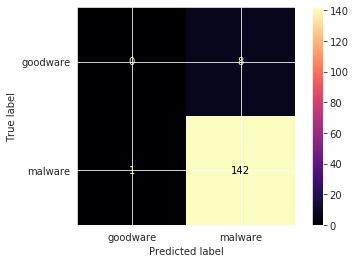

In [253]:
conf = confusion_matrix(classe_table_teste, prev)
disp = ConfusionMatrixDisplay(confusion_matrix=conf, display_labels=rede_neural_table.classes_)
disp.plot(cmap='magma')
